In [1]:
import pandas as pd
train = pd.read_csv('http://home.agh.edu.pl/~czech/datasets/ed-titanic-training.csv')
test = pd.read_csv('http://home.agh.edu.pl/~czech/datasets/ed-titanic-test.csv').iloc[:,1:]
train.head(3)

,Unnamed: 0,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,1,0,2,0,3,1,1,2,0,3
2,2,1,3,0,1,0,1,0,0,1,1,4


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

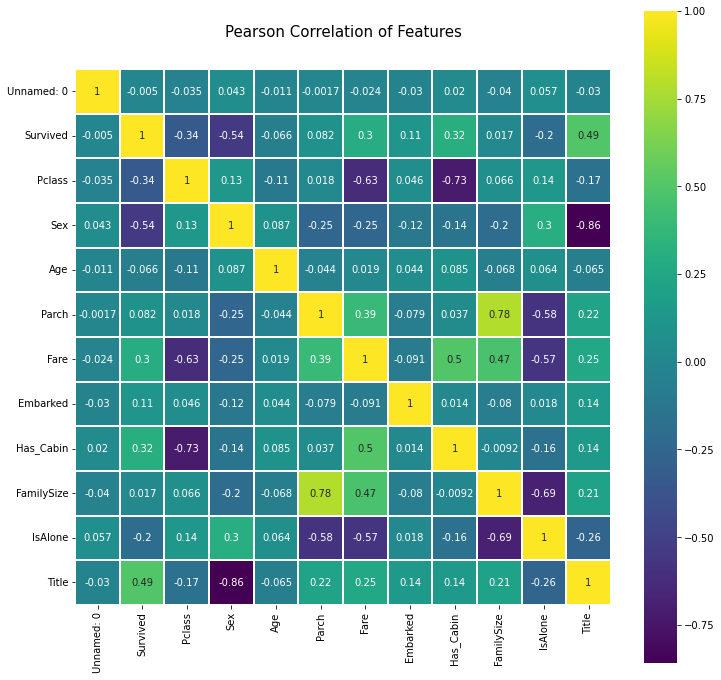

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

In [3]:
title_survived = train.loc[:,['Survived', 'Title']]
title_survived.head(3)

,Survived,Title
0,0,1
1,1,3
2,1,4


In [4]:
title_survived.groupby(['Title']).mean()

,Survived
Title,
1,0.156673
2,0.575000
3,0.793651
4,0.702703
5,0.347826


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, criterion, min_samples, cv=5, scoring='accuracy', retires=10):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        temp_cv = []
        temp_acc = []
        for retry in range(0,retires):
            tree_model = DecisionTreeClassifier(max_depth=depth, criterion=criterion, min_samples_leaf=min_samples)
            cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
            temp_cv.append(cv_scores)
            temp_acc.append(tree_model.fit(X, y).score(X, y))


        mean_scores = np.mean(temp_cv,axis=1)
        cv_scores_list.append(mean_scores)
        cv_scores_mean.append(mean_scores.mean())
        cv_scores_std.append(mean_scores.std())
        accuracy_scores.append(np.mean(temp_acc))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [47]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    # ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    # ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [7]:
x_train = train.iloc[:,2:]
y_train = train.loc[:,'Survived']

x_train.head(3)

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,0,2,0,1
1,1,0,2,0,3,1,1,2,0,3
2,3,0,1,0,1,0,0,1,1,4


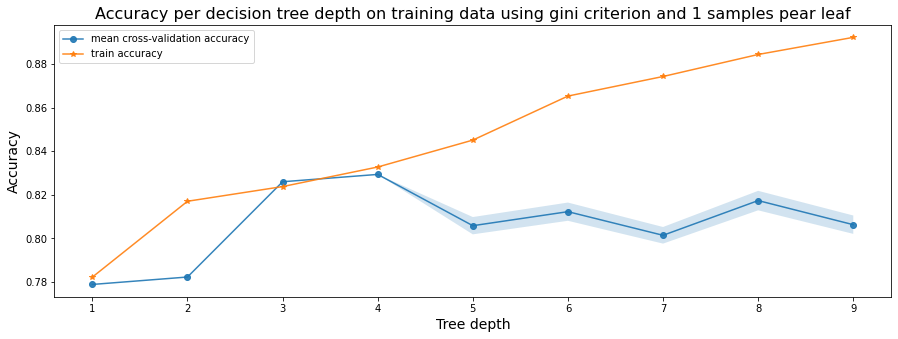

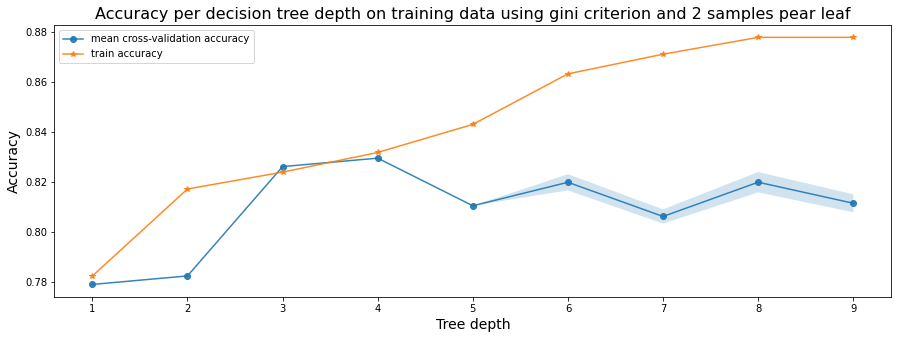

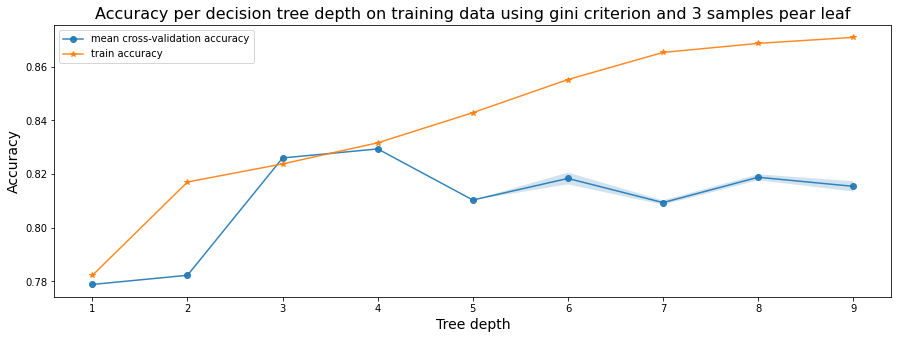

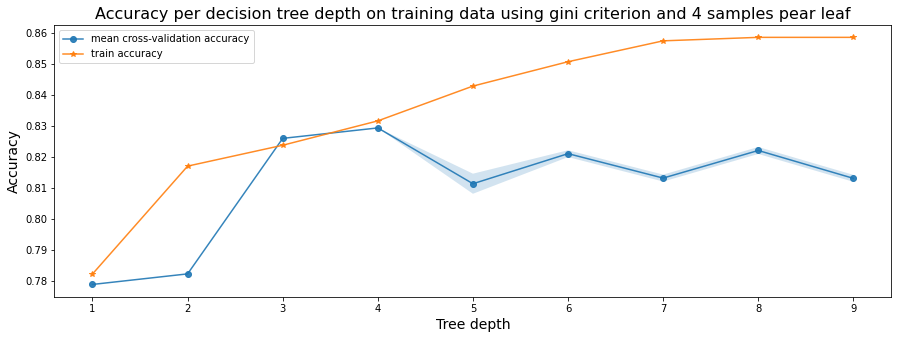

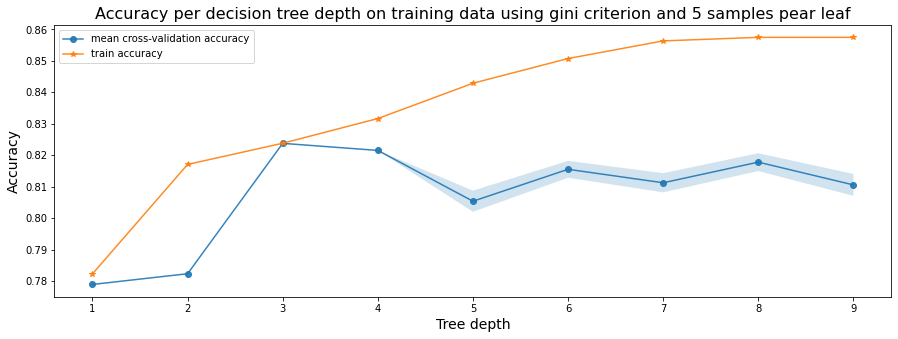

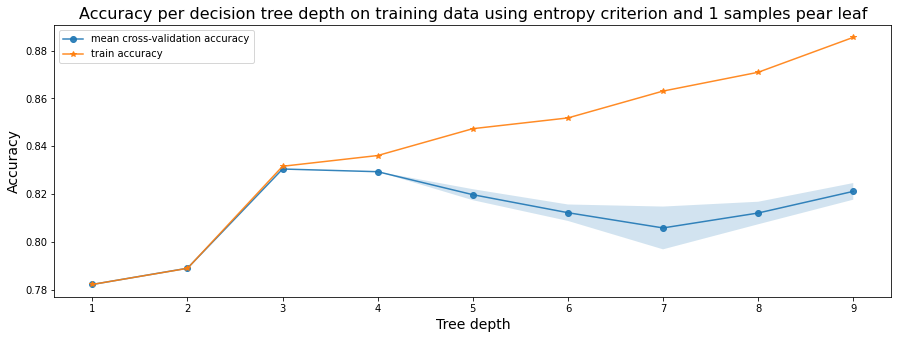

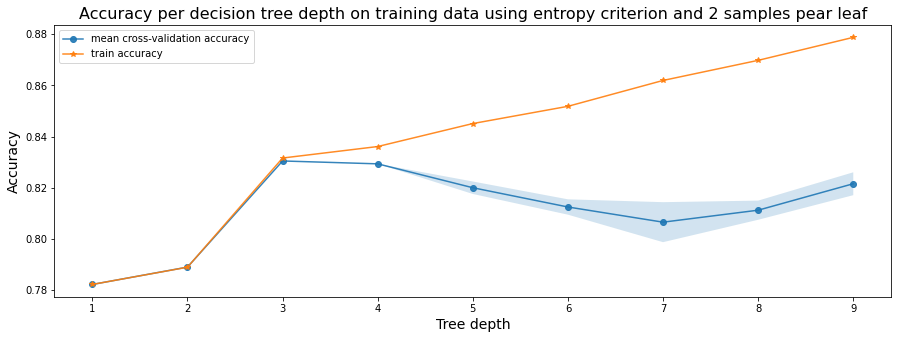

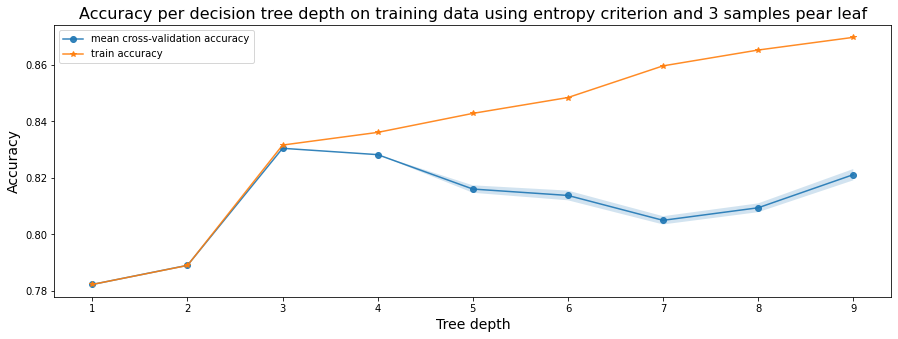

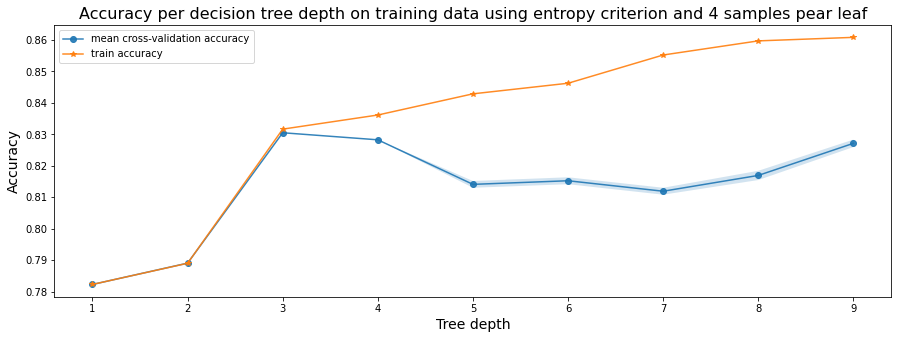

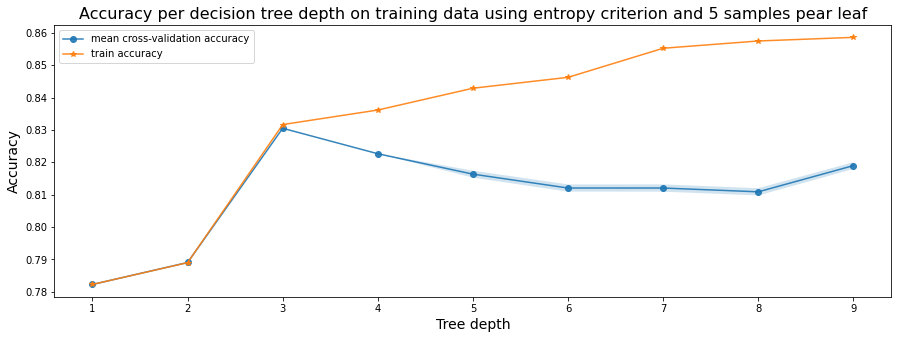

In [49]:
# fitting trees of depth 1 to 10
sm_tree_depths = range(1,10)

for criterion in ['gini', 'entropy']:
    for min_samples in range(1,6):
        sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths, criterion=criterion, min_samples=min_samples)

        # plotting accuracy
        plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               f'Accuracy per decision tree depth on training data using {criterion} criterion and {min_samples} samples pear leaf')

In [18]:
decision_tree = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
result = decision_tree.predict(test)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1]


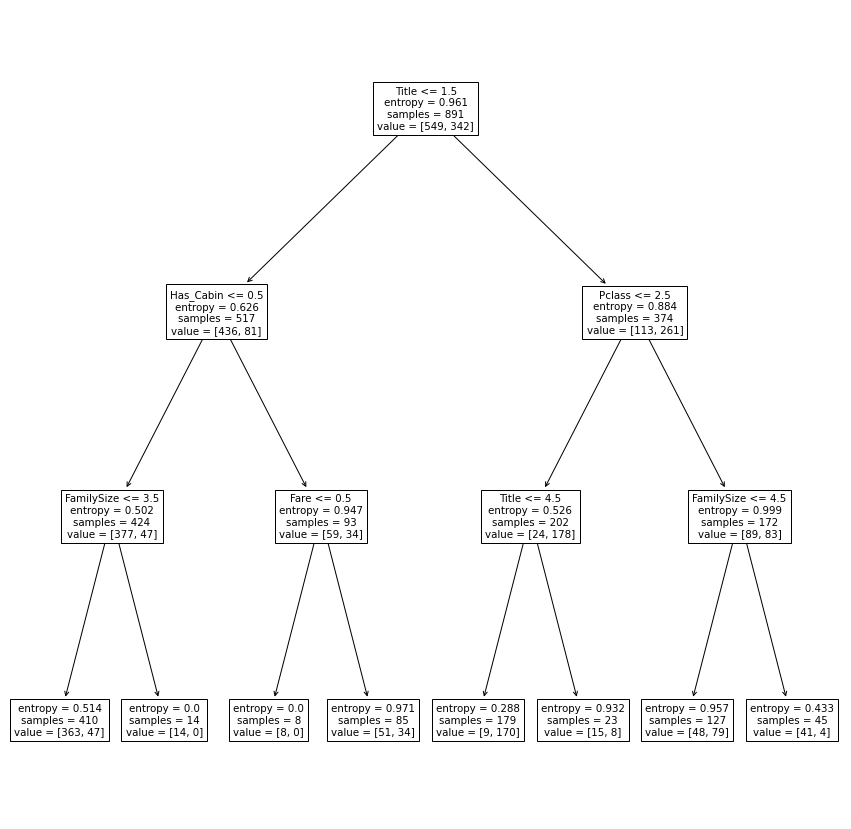

In [20]:
from sklearn.tree import plot_tree
names = test.columns
plt.figure(figsize=(15,15))
_=plot_tree(decision_tree, feature_names=names)

### Zadanie 8 zriobione przy sprawdzaniu cross validation.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.25)

In [22]:
decision_tree2 = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
decision_tree2.fit(X_train, Y_train)

result2 = decision_tree2.predict(X_test)

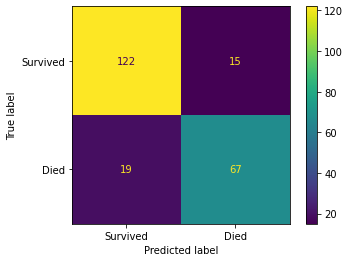

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(Y_test, result2)
ConfusionMatrixDisplay(matrix, display_labels=['Survived','Died']).plot()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
acc = accuracy_score(Y_test, result2)
f1 = f1_score(Y_test, result2)
aps = average_precision_score(Y_test, result2)
print(f'Accuray = {acc}')
print(f'F1 Score = {f1}')
print(f'Average precision-recall = {aps}')

Accuray = 0.8475336322869955
F1 Score = 0.7976190476190477
Average precision-recall = 0.7217587988269079


# KNN

In [36]:
from sklearn import datasets
iris = datasets.load_iris()

iris_x= iris['data']
iris_y= iris['target']

In [37]:
df = pd.read_csv('http://home.agh.edu.pl/~czech/vis-datasets/misc/nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values
df.head(3)

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
nyt_x = pca.fit_transform(array)
nyt_y = df.loc[:,'class.labels'].replace({'art': 0, 'music': 1})

In [42]:
from sklearn.neighbors import KNeighborsClassifier
def check_knn(X, y, dataset_name, ks, metric, weight, retries=10, cv=5, scoring='accuracy',):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for k in ks:
        temp_cv = []
        temp_acc = []
        for retry in range(0,retries):
            model = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
            temp_cv.append(cv_scores)
            temp_acc.append(model.fit(X, y).score(X, y))


        mean_scores = np.mean(temp_cv,axis=1)
        cv_scores_list.append(mean_scores)
        cv_scores_mean.append(mean_scores.mean())
        cv_scores_std.append(mean_scores.std())
        accuracy_scores.append(np.mean(temp_acc))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    plot_cross_validation_on_trees(ks, cv_scores_mean, cv_scores_std, accuracy_scores,
                       f'{dataset_name}: Accuracy per number of neighbours on training data using {weight} weights and {metric} metric')


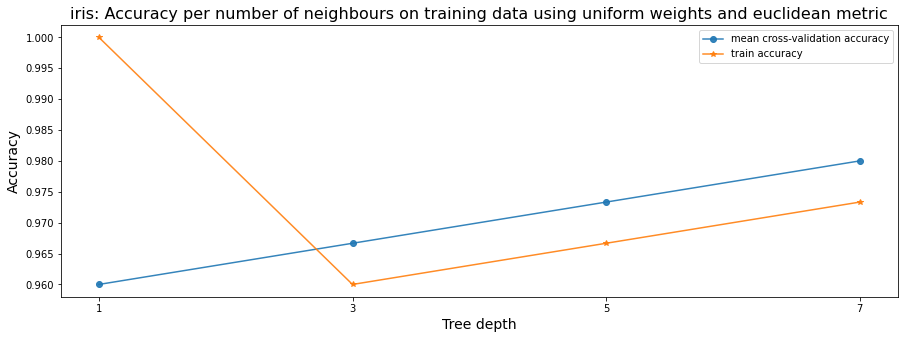

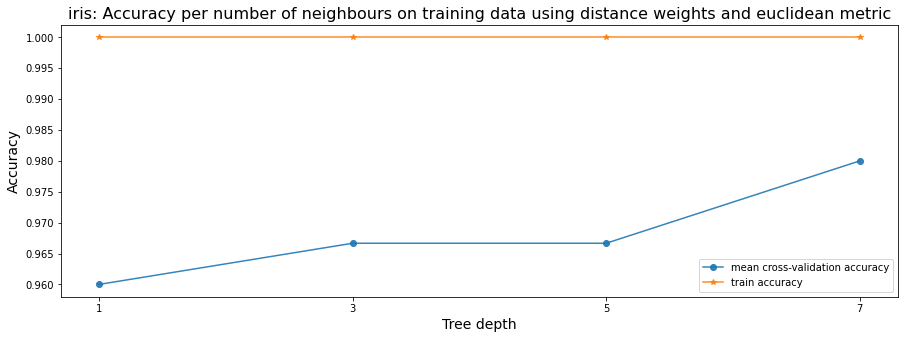

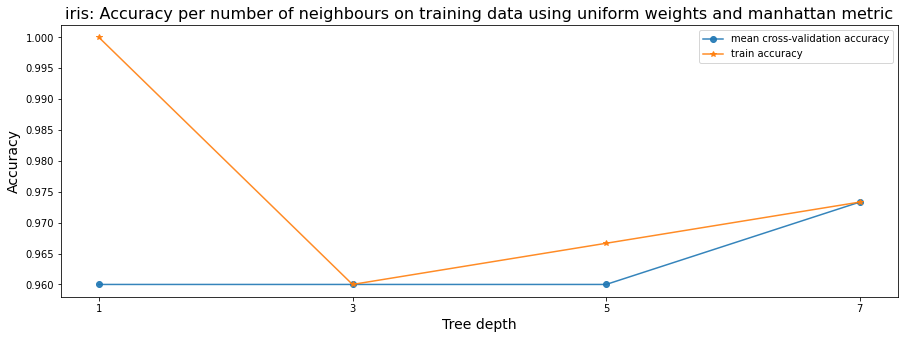

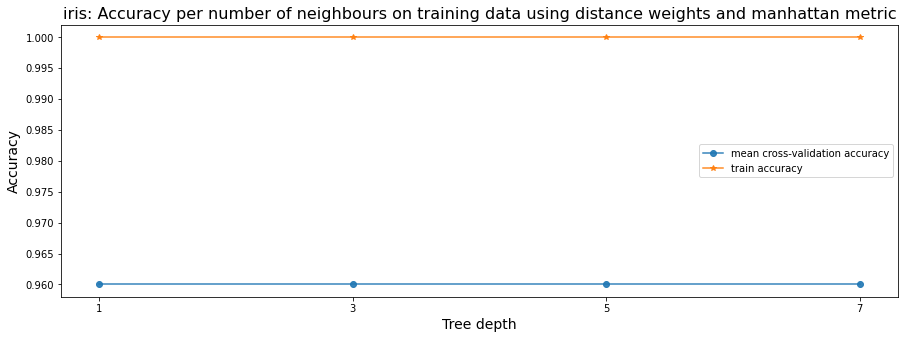

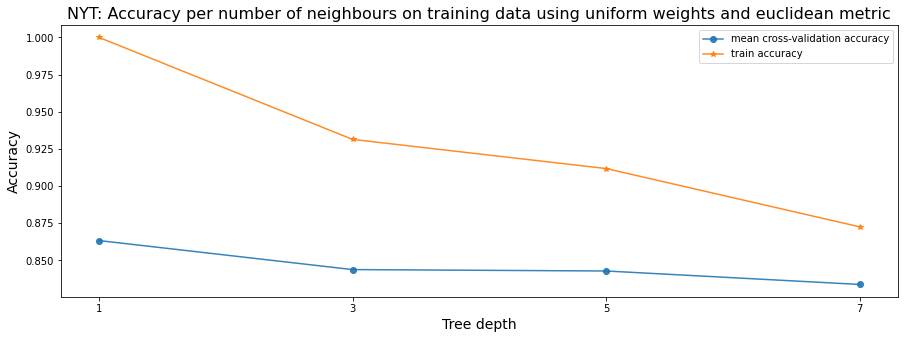

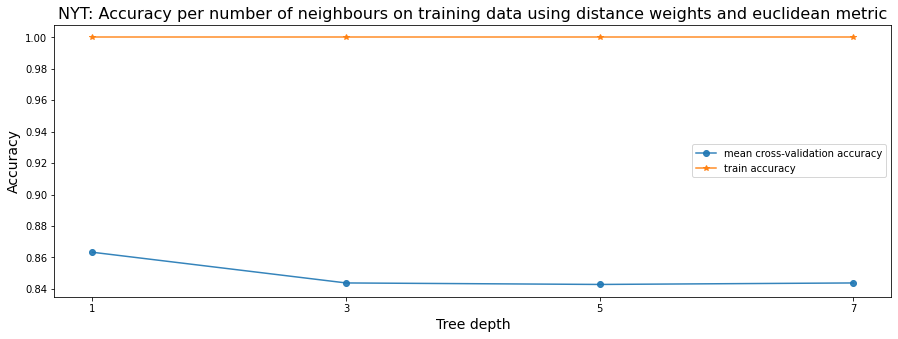

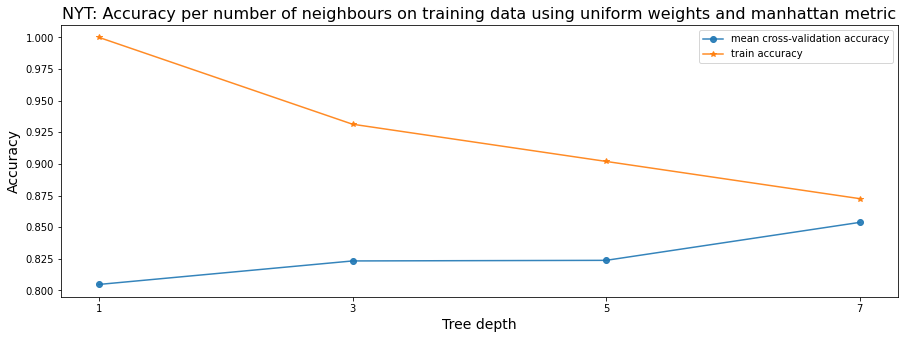

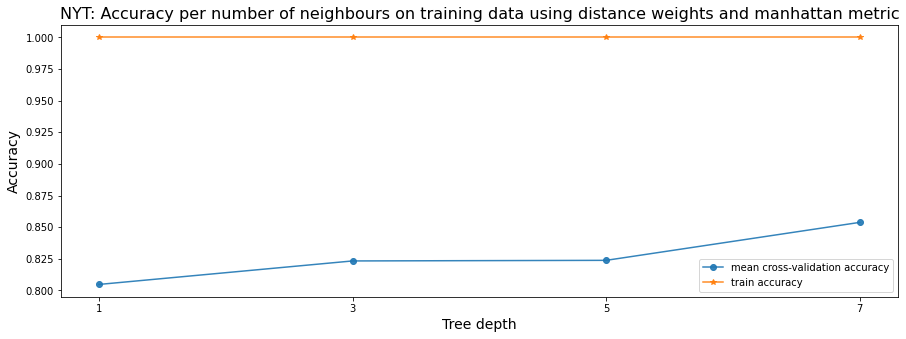

In [48]:
for dataset in [(iris_x, iris_y, 'iris'),(nyt_x, nyt_y, 'NYT')]:
    for curr_metric in ['euclidean', 'manhattan']:
        for curr_weights in ['uniform', 'distance']:
            check_knn(dataset[0], dataset[1], dataset[2], [1,3,5,7], curr_metric, curr_weights)




